# Analisis Google Places

## Links utiles:
### instalacion gmaps: https://github.com/pbugnion/gmaps
### tutorial gmaps: http://jupyter-gmaps.readthedocs.io/en/latest/gmaps.html

##

## Google places
### instalacion tirar en la consola: sudo pip install https://github.com/slimkrazy/python-google-places/zipball/master
### documentacion de la libreria: https://github.com/slimkrazy/python-google-places

##

## Para utilizar este notebook se debe bajar el siguiente set de datos:
### https://drive.google.com/open?id=0B_6KPWBDxfYQaFpXdl8wYktBZnc 
## y ubicarlo en la misma carpeta en donde esta este notebook

### Importacion de las librerias

In [1]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## A continuacion se debe agregar una API KEY propia

In [4]:
import gmaps
import gmaps.datasets
API_KEY='' # Your Google API key
gmaps.configure(api_key=API_KEY) 

In [5]:
from googleplaces import GooglePlaces, types, lang

google_places = GooglePlaces(API_KEY)

### Se carga el Dataframe con las columnas de google places calculadas

In [6]:
#cargo el dataset
import cPickle as pickle
props = pickle.load(open("porpiedadesConPlacesCompleto.p", "rb"))

In [7]:
props

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,properati_url,description,title,image_thumbnail,latlon,Cant_ColeYUniv,Cant_EspaciosVerdes,Cant_LocalesGastronomicos,Cant_ParadasTransporte,Cant_LugaresTuristicos
0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,http://www.properati.com.ar/udh_venta_casa_mer...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...,"(-34.66692, -58.70097)",12,0,91,29,1
1,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,http://www.properati.com.ar/20hi_venta_casa_me...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...,"(-34.66692, -58.70097)",12,0,91,29,1
2,9446052c949050359fb08b9f1ba83ba2eaa20c99,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6544492346,-58.4895603251",...,http://www.properati.com.ar/4m4m_venta_casa_ma...,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA,https://thumbs4.properati.com/6/DsNJjCb5_zIPV0...,"(-34.6544492346, -58.4895603251)",4,0,16,12,6
3,0f0e301809a14b8c069b267fa1c56a3b5ec35d9e,2013-03-23,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,...,http://www.properati.com.ar/6iiz_venta_departa...,VENTA DEPARTAMENTO 2 AMBIENTES EN RAMOS MEJÍA....,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/0/y0AjbI5mdYmcrt...,"(-34.6551, -58.55318)",4,3,24,20,2
4,681ee228d423d9f806d227388bfb7d42e1ac14c9,2013-03-23,sell,apartment,Villa Luzuriaga,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3427406.0,NaN,...,http://www.properati.com.ar/6ij5_venta_departa...,VENTA DUPLEX 2 AMBIENTES EN VILLA LUZURIAGA.Un...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/9/nv3sw0Ijy3Hwzd...,"(-34.65946, -58.58332)",6,0,49,17,0
5,bbb3e28bebd5681a8c6feea68350f2b25accaf79,2013-03-28,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,...,http://www.properati.com.ar/6l57_venta_departa...,VENTA TRIPLEX 4 AMBIENTES EN RAMOS MEJÍA.Excel...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/3/WoJ6D0CoBVPw2Z...,"(-34.6551, -58.55318)",4,3,24,20,2
6,d28cc72d2f9258c559bdfe40f0f110ba37677e04,2013-03-28,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,...,http://www.properati.com.ar/6l5h_venta_departa...,VENTA TRIPLEX 4 AMBIENTES EN RAMOS MEJÍA.Excel...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/7/0MTjm6rJrvT2Rb...,"(-34.6551, -58.55318)",4,3,24,20,2
7,c109d265e74c79e92bf122660243e8ce79f8dde5,2013-03-28,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,...,http://www.properati.com.ar/6l5i_venta_departa...,VENTA TRIPLEX 4 AMBIENTES EN RAMOS MEJÍA.Excel...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/9/WYh0K-wVD0FtYl...,"(-34.6551, -58.55318)",4,3,24,20,2
8,e70cc2a42df963bbc7615cce8649afbe6d053927,2013-04-12,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,...,http://www.properati.com.ar/6p90_venta_departa...,VENTA DEPARTAMENTO 2 AMBIENTES EN RAMOS MEJÍA....,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/5/Pl_j4W8v0TYICZ...,"(-34.6551, -58.55318)",4,3,24,20,2
9,10221a1b3c08244137b0e3dcf68ff971ffef7ec3,2013-05-05,sell,house,Barracas,|Argentina|Capital Federal|Barracas|,Argentina,Capital Federal,3436134.0,"-34.6514583,-58.3773545",...,http

## Analisis de Colegios y Universidades

In [8]:
#Se obtuvo la cantidad de colegios y universidades que hay en un radio de 400 metros de radio
#del lugar en cuestion
#se procede a realizar un analisis al respecto

#### Analisis por precio del metro cuadrado

In [9]:
edu = props[['Cant_ColeYUniv','price_usd_per_m2']].groupby('Cant_ColeYUniv').\
    agg([np.mean, np.size]) 

In [13]:
edu = edu[edu['price_usd_per_m2','size'] > 300]
edu = edu['price_usd_per_m2','mean']

In [14]:
edu

Cant_ColeYUniv
0     1630.353510
1     1557.006874
2     1601.699907
3     1533.488735
4     1617.310348
5     1685.475203
6     1800.912474
7     1809.251665
8     2062.680899
9     4424.975849
10    2129.147649
11    2392.485312
12    2482.998053
13    2587.925823
14    3243.523526
15    1933.018290
16    2754.926856
17    2553.131767
18    2849.064724
19    5711.844669
20    2589.164341
21    2319.147587
22    2394.162844
23    2213.706781
24    2793.356691
25    2554.170980
26    2598.569327
27    2732.817834
28    2647.289433
29    3100.837498
30    2525.219571
31    2435.497848
32    2702.281600
33    2634.930961
34    1835.945620
35    2305.804542
36    3214.434225
37    2770.838718
38    2284.475058
39    2472.673684
40    2430.219240
Name: (price_usd_per_m2, mean), dtype: float64

In [15]:
props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72474 entries, 0 to 72473
Data columns (total 33 columns):
id                            72474 non-null object
created_on                    72474 non-null object
operation                     72474 non-null object
property_type                 72474 non-null object
place_name                    72446 non-null object
place_with_parent_names       72474 non-null object
country_name                  72474 non-null object
state_name                    72474 non-null object
geonames_id                   62030 non-null float64
lat-lon                       48174 non-null object
lat                           48174 non-null float64
lon                           48174 non-null float64
price                         72474 non-null float64
currency                      72473 non-null object
price_aprox_local_currency    72474 non-null float64
price_aprox_usd               72474 non-null float64
surface_total_in_m2           72474 non-null float64


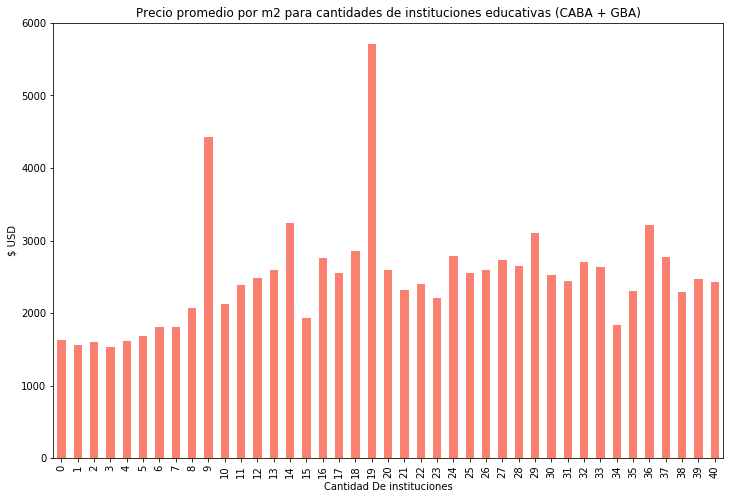

In [16]:
ax = edu.plot(kind = 'bar', title="Precio promedio por m2 para cantidades de instituciones educativas (CABA + GBA)",linewidth=2,figsize=(12,8), color='salmon', legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De instituciones')

plt.show()

In [17]:
#solo caba
caba = props[props['state_name'].str.contains("Capital Federal")]

eduCABA = caba[['Cant_ColeYUniv','price_usd_per_m2']].groupby('Cant_ColeYUniv').agg([np.mean, np.size]) 

eduCABA = eduCABA[eduCABA['price_usd_per_m2','size'] > 300]
#eduCABA = eduCABA[eduCABA['price_usd_per_m2','mean'] < 5000]
eduCABA = eduCABA['price_usd_per_m2','mean']

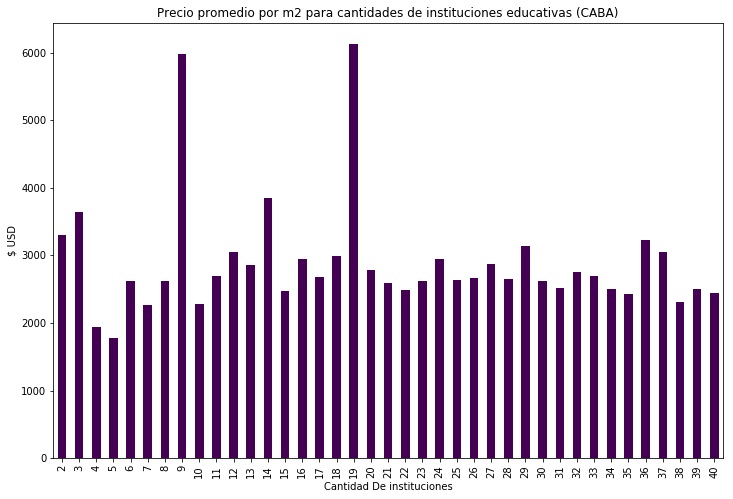

In [18]:
ax = eduCABA.plot(kind='bar', title="Precio promedio por m2 para cantidades de instituciones educativas (CABA)",linewidth=2,figsize=(12,8), colormap="viridis", legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De instituciones')
plt.show()

In [19]:
#solo GBA
GBA = props[props['state_name'] != "Capital Federal"]

eduGBA = GBA[['Cant_ColeYUniv','price_usd_per_m2']].groupby('Cant_ColeYUniv').agg([np.mean, np.size]) 

eduGBA = eduGBA[eduGBA['price_usd_per_m2','size'] > 300]
#eduGBA = eduGBA[eduCABA['price_usd_per_m2','mean'] < 2400]
eduGBA = eduGBA['price_usd_per_m2','mean']

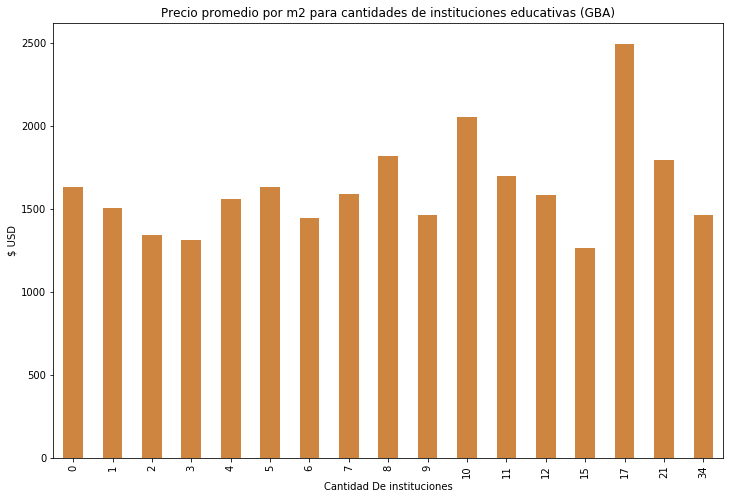

In [20]:
ax = eduGBA.plot(kind='bar', title="Precio promedio por m2 para cantidades de instituciones educativas (GBA)",linewidth=2,figsize=(12,8), color='peru', legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De instituciones')
plt.show()

#### Conclusiones intermedias

In [21]:
#Como se puede observar en los tres graficos, hay una tendencia de un pico maximo compartido para una cantidad de instituciones entre 15 y 20
#Se procede a aislar estas y ver en que zonas esta

In [22]:
eduReducido = props[(props['Cant_ColeYUniv'] > 15) & (props['Cant_ColeYUniv'] < 21)]
eduCABAReducido = props[(props['Cant_ColeYUniv'] > 15) & (props['Cant_ColeYUniv'] < 21) & (props['state_name'].str.contains("Capital Federal"))]
eduGBAReducido = props[(props['Cant_ColeYUniv'] > 15) & (props['Cant_ColeYUniv'] < 21) & (props['state_name'] != "Capital Federal")]

In [23]:
#CABA + GBA; HEATMAP por ubicaciones 
locations = eduReducido['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)

heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 10

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [24]:
#CABA + GBA; HEATMAP por precio del metro cuadrado 
locations = eduReducido['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=eduReducido['price_usd_per_m2'])

heatmap_layer.max_intensity = 900000
heatmap_layer.point_radius = 10

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [25]:
#CABA 19 instituciones; HEATMAP por ubicaciones
maxCABA = props[(props['Cant_ColeYUniv'] == 19) & (props['state_name'] == "Capital Federal")]
locations = maxCABA['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)

heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 10

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [26]:
#CABA 19 instituciones; HEATMAP por precio del metro cuadrado
maxCABA = props[(props['Cant_ColeYUniv'] == 19) & (props['state_name'] == "Capital Federal")]
locations = maxCABA['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=maxCABA['price_usd_per_m2'])

heatmap_layer.max_intensity = 100000
heatmap_layer.point_radius = 10

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [27]:
#CABA 9 instituciones; HEATMAP por ubicaciones
maxCABA = props[(props['Cant_ColeYUniv'] == 9) & (props['state_name'] == "Capital Federal")]
locations = maxCABA['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)

heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 10

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [28]:
#CABA 9 instituciones; HEATMAP por precio del metro cuadrado
maxCABA = props[(props['Cant_ColeYUniv'] == 9) & (props['state_name'] == "Capital Federal")]
locations = maxCABA['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=maxCABA['price_usd_per_m2'])

heatmap_layer.max_intensity = 100000
heatmap_layer.point_radius = 10

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [29]:
#solo GBA 17 instituciones; HEATMAP por ubicaciones 
maxGBA = props[(props['Cant_ColeYUniv'] == 17) & (props['state_name'] != "Capital Federal")]
locations = maxGBA['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)

heatmap_layer.max_intensity = 50
heatmap_layer.point_radius = 10

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [30]:
#GBA 17 instituciones; HEATMAP por precio del metro cuadrado
maxGBA = props[(props['Cant_ColeYUniv'] == 17) & (props['state_name'] != "Capital Federal")]
locations = maxGBA['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=maxGBA['price_usd_per_m2'])

heatmap_layer.max_intensity = 60000
heatmap_layer.point_radius = 10

fig.add_layer(heatmap_layer)
fig


A Jupyter Widget

#### ¿Que se obtiene de todo esto?

Se pueden ubicar polos en donde hay una cantidad importante de instituciones educativas (entre 15 y 20 en un rango de 400 metros de readio)
y a la vez los precios por metro cuadrado son altos en comparacion a la totalidad de las propiedades. En ellos se genera una tendencia 
que prodria marcar una relacion directa entre estos dos factores. Estos lugares son:

Olivos
San Cristobal
Villa Urquiza/General Urquiza

A menor escala, zonas centricas de las siguientes zonas:
Merlo
San Miguel
Quilmes

Y en barrios de capital:
Recoleta
Belgrano
Puerto Madero
Almagro

#### ¿Cuales son las instituciones educativas en estos polos?

In [31]:
#muestreo de los datos obtenidos
#Olivos

local = dict()
local["lat"] = str(-34.50683954)
local["lng"] = str(-58.48616838)

query_result = google_places.radar_search(lat_lng=local, radius=1000, 
                                              types=[types.TYPE_SCHOOL, types.TYPE_UNIVERSITY])

for place in query_result.places:
    place.get_details()
    print place.name

Northlands
Colegio San Andrés secondary
Centro Cultural Italiano - Colegio Alessandro Manzoni
St. Andrew's Scots School
Instituto Jesús en el Huerto de los Olivos
Escuela Montessori Olivos SRL
Colegio San Ignacio
Colegio Nuestra Señora de la Paz
St. Luke's College
Action Integral Institute of Performing Arts
Escuela Municipal Paula Albarracín de Sarmiento
San Andres Secundario Olivos
St. Nicholas College
Instituto Superior De Musica Jose Hernandez
Escuela EPB Nº 2 “Benemérito Teniente Gral. Bartolomé Mitre”
UCES OLIVOS
UCES Olivos
Colegio Tarbut
Estudio Cambrée Tatiana Flaker
UCES UNIVERSITY OF BUSINESS AND SOCIAL SCIENCES
Fundacion Universidad de San Isidro
Colegio San Nicolas Primario
COLEGIO SAN NICOLAS JARDIN
Escuela Superior De Informatica De La Prefectura Naval Argentina
CENTRO PAMPA / escuela de diseño
Santa Magdalena Dipregep 930/5798
Colegio Santa Magdalena
Colegio Eidep
De Los O Colegio Jesus En El Huerto
Jardin San Ignacio
E.M.P.A.S
Ganesha YOGA
Colegio Feli
Escuela Hija St 

In [29]:
#muestreo de los datos obtenidos
#San Cristobal

local = dict()
local["lat"] = str(-34.62529786)
local["lng"] = str(-58.42207432)

query_result = google_places.radar_search(lat_lng=local, radius=600, 
                                              types=[types.TYPE_SCHOOL, types.TYPE_UNIVERSITY])

for place in query_result.places:
    place.get_details()
    print place.name

DE LAS VICTORIAS
La Aldea del Buen Ayre
Instit Salesiana - Colegio San Antonio
Escuela Generación del Futuro
Danza Árabe Escuela Aldana Arguello
Sol de America
Crema y Chocolate
Crema y Chocolate
Fundacion tomas eloy martinez
Curso de cerrajerìa presencial e intensivo
Cenedi
AUDITORIO NAMUNCURA
Colegio San José de Calasanz
Colegio Calasanz
San Antonio
ILEC - Instituto Laico de Estudios Contemporaneos
Special Education Institute OUR LADY OF LUJAN
Curso Sublimacion
Escuela Domiciliaria N° 2
JIC N°4 DE 6° MARIANO BOEDO
Ciber Pibes
Escuela Infantil Cyberpibes
Instructorado De KIZOMBA
Esc de Com Nº 22 DE 6 "G. M. Zubiria "
Espacio De Creacion Yapeyu
ESCUELA N. 6 D.E. 8 SAN JOSÉ DE CALASANZ
Escuela N 25 Paula A De Sarmiento
Pasillo al fondo "Centro Cultural"
Instituto Calazans
Escuela Lucia
ESCUELA PAULA ALBARRACIN DE SARMIENTO
Escuela Infantil La Torrecita
"Puente Azul" Jardín de Infantes
Taller De Arte Hilodearbol
San Antonio Salesian house
Curso Calidad
SANTA MARIA INSTITUTE
Instituto San

In [32]:
#muestreo de los datos obtenidos
#Villa Urquiza

local = dict()
local["lat"] = str(-34.56665522)
local["lng"] = str(-58.48415136)

query_result = google_places.radar_search(lat_lng=local, radius=600, 
                                              types=[types.TYPE_SCHOOL, types.TYPE_UNIVERSITY])

for place in query_result.places:
    place.get_details()
    print place.name

School No. 24 Francisco Morazan
San Patricio Secondary Institute
Nuevos Aires SRL
Sir Thomas Malory
Mad Escuela
Sir Thomas Malory School
Estudio Joya
Instituto Superior del Profesorado en Educación Especial
INA - Instituto Nuevos Aires
St. Patrick's School
Escuela Infantil Chiquilines
Instituto Junín
The Garden of the Fund
Special Education School 11
Burdel de maderas
Clases de Guitarra en Villa Urquiza - Música y creatividad
St. Patrick's School instituto San Patricio
Saint Patrick
Acha Club
Caebt 56 - Parroquia Jesús Misericordioso
St patrick's Kinder
Naranon grupo
Escuela Nro. 4 D.E. 15
Escuela Nro 24 D.E.15 - Escuela Nro 8
Ispee
Facu Aye
Facultad Moron
ESc Infantil N 8 DE 15
San Pablo
Island of My Dreams
escuela republica de costa rica
Escuela N° 24 SIGLO XXI
Escuela n•15 acevedo
Universidad -ciclo basico
CBC Drago
Colegio Franco
UBA - Drago
UBA Sede Drago
Cbc
CBC UBA - Sede Drago


#### Relacion entre el tamaño de una propiedad y la cantidad de instituciones educativas

In [33]:
edu = props[['Cant_ColeYUniv','surface_total_in_m2']].groupby('Cant_ColeYUniv').\
    agg([np.mean, np.size]) 
    
edu = edu[edu['surface_total_in_m2','size'] > 300]
edu = edu['surface_total_in_m2','mean']    

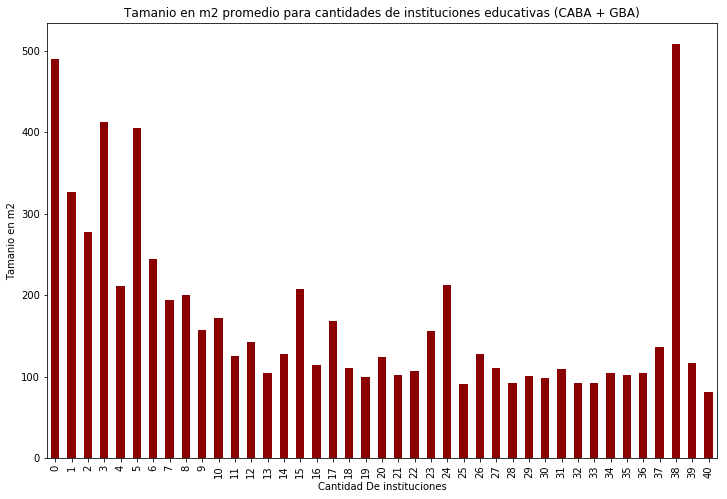

In [34]:
ax = edu.plot(kind='bar', title="Tamanio en m2 promedio para cantidades de instituciones educativas (CABA + GBA)",linewidth=2,figsize=(12,8), color='darkred', legend=False)
ax.set_ylabel('Tamanio en m2')
ax.set_xlabel('Cantidad De instituciones')

plt.show()

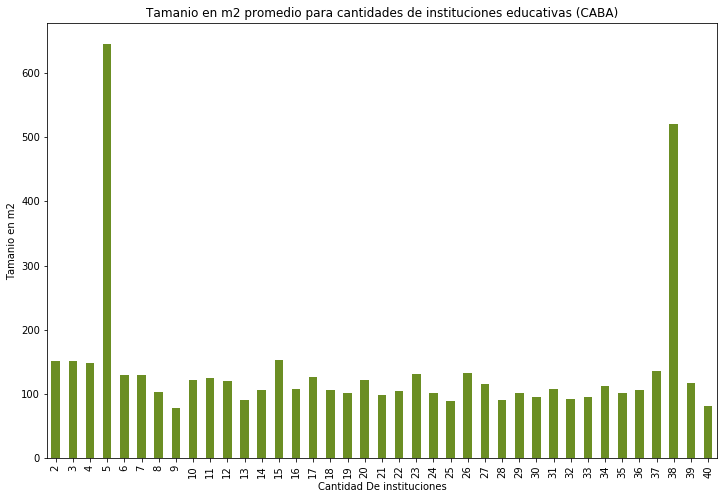

In [35]:
#solo caba
caba = props[props['state_name'].str.contains("Capital Federal")]

eduCABA = caba[['Cant_ColeYUniv','surface_total_in_m2']].groupby('Cant_ColeYUniv').agg([np.mean, np.size]) 

eduCABA = eduCABA[eduCABA['surface_total_in_m2','size'] > 300]
#eduCABA = eduCABA[eduCABA['surface_total_in_m2','mean'] < 500]
eduCABA = eduCABA['surface_total_in_m2','mean']

ax = eduCABA.plot(kind='bar' ,title="Tamanio en m2 promedio para cantidades de instituciones educativas (CABA)",linewidth=2,figsize=(12,8), color="olivedrab", legend=False)
ax.set_ylabel('Tamanio en m2')
ax.set_xlabel('Cantidad De instituciones')
plt.show()

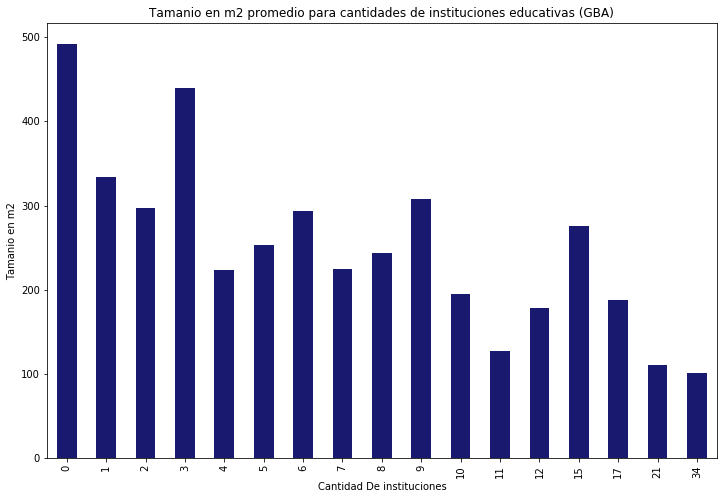

In [36]:
#solo GBA
GBA = props[props['state_name'] != "Capital Federal"]

eduGBA = GBA[['Cant_ColeYUniv','surface_total_in_m2']].groupby('Cant_ColeYUniv').agg([np.mean, np.size]) 

eduGBA = eduGBA[eduGBA['surface_total_in_m2','size'] > 300]
eduGBA = eduGBA['surface_total_in_m2','mean']

ax = eduGBA.plot(kind='bar', title="Tamanio en m2 promedio para cantidades de instituciones educativas (GBA)",linewidth=2,figsize=(12,8), color="midnightblue", legend=False)
ax.set_ylabel('Tamanio en m2')
ax.set_xlabel('Cantidad De instituciones')
plt.show()

In [37]:
eduCABAReducido = props[(props['Cant_ColeYUniv'] == 5) | (props['Cant_ColeYUniv'] == 38) & (props['state_name'].str.contains("Capital Federal"))]
eduCABA5 = props[(props['Cant_ColeYUniv'] == 5) & (props['state_name'].str.contains("Capital Federal"))]
eduCABA38 = props[(props['Cant_ColeYUniv'] == 38) & (props['state_name'].str.contains("Capital Federal"))]

In [38]:
#CABA completo; HEATMAP por ubicaciones superficie
locations = eduCABAReducido['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)

heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 10

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [39]:
#CABA 5 instituciones; HEATMAP por ubicaciones superficie
locations = eduCABA5['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)

heatmap_layer.max_intensity = 50
heatmap_layer.point_radius = 10

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [40]:
#CABA 5 instituciones; HEATMAP por precio superficie
locations = eduCABA5['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=eduCABA5['price_usd_per_m2'])

heatmap_layer.max_intensity = 100000
heatmap_layer.point_radius = 10

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [41]:
#CABA 38 instituciones; HEATMAP por precios superficie
locations = eduCABA38['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=eduCABA38['price_usd_per_m2'])

heatmap_layer.max_intensity = 100000
heatmap_layer.point_radius = 10

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [42]:
props

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,properati_url,description,title,image_thumbnail,latlon,Cant_ColeYUniv,Cant_EspaciosVerdes,Cant_LocalesGastronomicos,Cant_ParadasTransporte,Cant_LugaresTuristicos
0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,http://www.properati.com.ar/udh_venta_casa_mer...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...,"(-34.66692, -58.70097)",12,0,91,29,1
1,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,http://www.properati.com.ar/20hi_venta_casa_me...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...,"(-34.66692, -58.70097)",12,0,91,29,1
2,9446052c949050359fb08b9f1ba83ba2eaa20c99,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6544492346,-58.4895603251",...,http://www.properati.com.ar/4m4m_venta_casa_ma...,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA,https://thumbs4.properati.com/6/DsNJjCb5_zIPV0...,"(-34.6544492346, -58.4895603251)",4,0,16,12,6
3,0f0e301809a14b8c069b267fa1c56a3b5ec35d9e,2013-03-23,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,...,http://www.properati.com.ar/6iiz_venta_departa...,VENTA DEPARTAMENTO 2 AMBIENTES EN RAMOS MEJÍA....,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/0/y0AjbI5mdYmcrt...,"(-34.6551, -58.55318)",4,3,24,20,2
4,681ee228d423d9f806d227388bfb7d42e1ac14c9,2013-03-23,sell,apartment,Villa Luzuriaga,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3427406.0,NaN,...,http://www.properati.com.ar/6ij5_venta_departa...,VENTA DUPLEX 2 AMBIENTES EN VILLA LUZURIAGA.Un...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/9/nv3sw0Ijy3Hwzd...,"(-34.65946, -58.58332)",6,0,49,17,0
5,bbb3e28bebd5681a8c6feea68350f2b25accaf79,2013-03-28,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,...,http://www.properati.com.ar/6l57_venta_departa...,VENTA TRIPLEX 4 AMBIENTES EN RAMOS MEJÍA.Excel...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/3/WoJ6D0CoBVPw2Z...,"(-34.6551, -58.55318)",4,3,24,20,2
6,d28cc72d2f9258c559bdfe40f0f110ba37677e04,2013-03-28,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,...,http://www.properati.com.ar/6l5h_venta_departa...,VENTA TRIPLEX 4 AMBIENTES EN RAMOS MEJÍA.Excel...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/7/0MTjm6rJrvT2Rb...,"(-34.6551, -58.55318)",4,3,24,20,2
7,c109d265e74c79e92bf122660243e8ce79f8dde5,2013-03-28,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,...,http://www.properati.com.ar/6l5i_venta_departa...,VENTA TRIPLEX 4 AMBIENTES EN RAMOS MEJÍA.Excel...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/9/WYh0K-wVD0FtYl...,"(-34.6551, -58.55318)",4,3,24,20,2
8,e70cc2a42df963bbc7615cce8649afbe6d053927,2013-04-12,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,...,http://www.properati.com.ar/6p90_venta_departa...,VENTA DEPARTAMENTO 2 AMBIENTES EN RAMOS MEJÍA....,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/5/Pl_j4W8v0TYICZ...,"(-34.6551, -58.55318)",4,3,24,20,2
9,10221a1b3c08244137b0e3dcf68ff971ffef7ec3,2013-05-05,sell,house,Barracas,|Argentina|Capital Federal|Barracas|,Argentina,Capital Federal,3436134.0,"-34.6514583,-58.3773545",...,http

In [43]:
len(props)

72474

## Analisis de Locales Gastronomicos

#### analisis por precio del metro cuadrado

In [44]:
gas = props[['Cant_LocalesGastronomicos','price_usd_per_m2']].groupby('Cant_LocalesGastronomicos').\
    agg([np.mean, np.size])
gas.reset_index(inplace=True)

In [45]:
#gasRed = gas[gas['price_usd_per_m2','size'] > 300]
gasRed = gas[gas['price_usd_per_m2','mean'] < 8000]
gasProm = gasRed['price_usd_per_m2', 'mean']
gasRed.describe(percentiles=[0.25,0.5,0.75,0.9, 0.99])

Cant_LocalesGastronomicos price_usd_per_m2             
                                            mean         size
count                198.000000       198.000000   198.000000
mean                 100.090909      2281.162590   359.151515
std                   58.449004       564.968541   688.093502
min                    0.000000      1015.286717    43.000000
25%                   49.250000      1897.817033    99.250000
50%                  100.500000      2328.113959   158.500000
75%                  150.750000      2631.072748   325.000000
90%                  180.300000      2914.568128   644.000000
99%                  198.030000      3659.945772  3002.880000
max                  200.000000      4498.586900  6105.000000

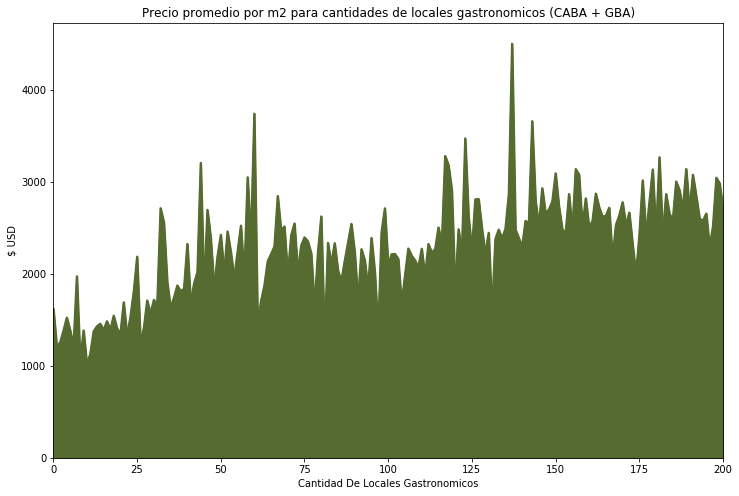

In [46]:
ax = gasProm.plot(kind = 'area', title="Precio promedio por m2 para cantidades de locales gastronomicos (CABA + GBA)",linewidth=2,figsize=(12,8), color='darkolivegreen', legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De Locales Gastronomicos')

plt.show()

In [47]:
#solo caba
caba = props[props['state_name'].str.contains("Capital Federal")]

gasCABA = caba[['Cant_LocalesGastronomicos','price_usd_per_m2']].groupby('Cant_LocalesGastronomicos').agg([np.mean, np.size]) 

gasCABA = gasCABA[gasCABA['price_usd_per_m2','mean'] < 8000]
gasCABA = gasCABA['price_usd_per_m2','mean']

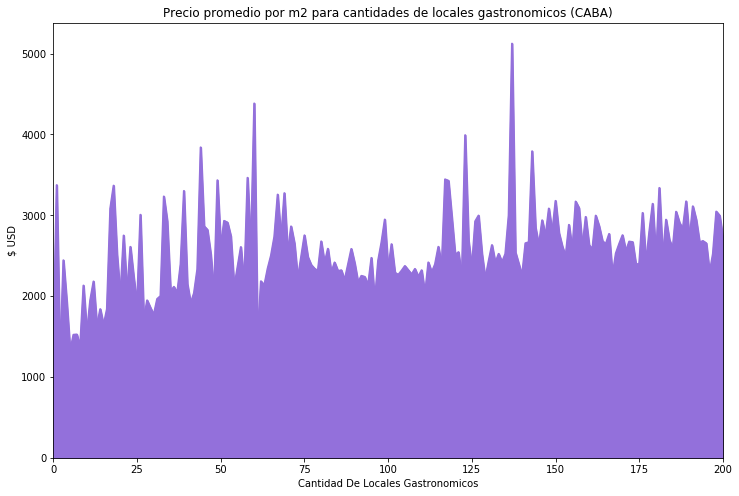

In [48]:
ax = gasCABA.plot(kind = 'area', title="Precio promedio por m2 para cantidades de locales gastronomicos (CABA)",linewidth=2,figsize=(12,8), color='mediumpurple', legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De Locales Gastronomicos')

plt.show()

In [49]:
#solo GBA
GBA = props[props['state_name'] != "Capital Federal"]

gasGBA = GBA[['Cant_LocalesGastronomicos','price_usd_per_m2']].groupby('Cant_LocalesGastronomicos').agg([np.mean, np.size]) 

gasGBA = gasGBA[gasGBA['price_usd_per_m2','mean'] < 8000]
gasGBA = gasGBA['price_usd_per_m2','mean']

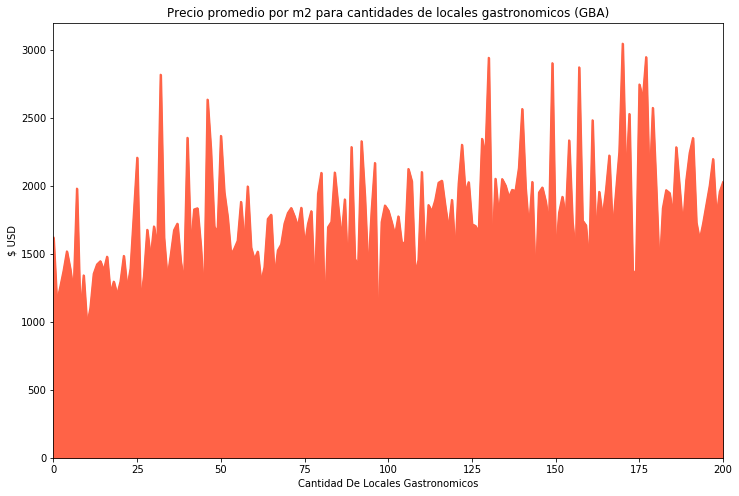

In [50]:
ax = gasGBA.plot(kind = 'area', title="Precio promedio por m2 para cantidades de locales gastronomicos (GBA)",linewidth=2,figsize=(12,8), color='tomato', legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De Locales Gastronomicos')

plt.show()

In [51]:
#CABA +GBA de 0 a 20 locales; HEATMAP con el el peso en el precio por metro cuadrado de locales gastronomicos

gasTot = props.copy()
gasTot = gasTot[gasTot['price_usd_per_m2'] < 8000]
gasTot = gasTot[gasTot['Cant_LocalesGastronomicos'] < 21]

locations = gasTot['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=gasTot['price_usd_per_m2'])

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [52]:
heatmap_layer.max_intensity = 10000
heatmap_layer.point_radius = 5

In [53]:
#CABA +GBA de 180 a 200 locales; HEATMAP con el el peso en el precio por metro cuadrado de locales gastronomicos

gasTotmax = props.copy()
gasTotmax = gasTotmax[gasTotmax['price_usd_per_m2'] < 8000]
gasTotmax = gasTotmax[gasTotmax['Cant_LocalesGastronomicos'] > 180]

locations = gasTotmax['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=gasTotmax['price_usd_per_m2'])

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [54]:
heatmap_layer.max_intensity = 1000000
heatmap_layer.point_radius = 10

## Puntos de Interes Cultural

### Analisis por precio del metro cuadrado

In [55]:
tur = props[['Cant_LugaresTuristicos','price_usd_per_m2']].groupby('Cant_LugaresTuristicos').\
    agg([np.mean, np.size])
tur.reset_index(inplace=True)

In [56]:
turRED = tur[tur['Cant_LugaresTuristicos'] < 65]
turRED = turRED[turRED['price_usd_per_m2', 'size'] > 10]
turRED.reset_index(inplace=True)
turRED.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

index Cant_LugaresTuristicos price_usd_per_m2              
                                                    mean          size
count  50.000000              50.000000        50.000000     50.000000
mean   24.860000              24.880000      2734.876964   1446.240000
std    15.277047              15.323238       460.508325   2958.764501
min     0.000000               0.000000      1503.709697     11.000000
1%      0.490000               0.490000      1581.518176     11.490000
10%     4.900000               4.900000      2261.454614     36.000000
25%    12.250000              12.250000      2464.815450     58.250000
50%    24.500000              24.500000      2650.777954    144.000000
75%    36.750000              36.750000      3083.204453   1403.750000
90%    44.100000              44.100000      3348.284666   4531.800000
99%    57.530000              58.040000      3629.836037  12700.590000
max    59.000000              60.000000      3697.106975  15400.000000

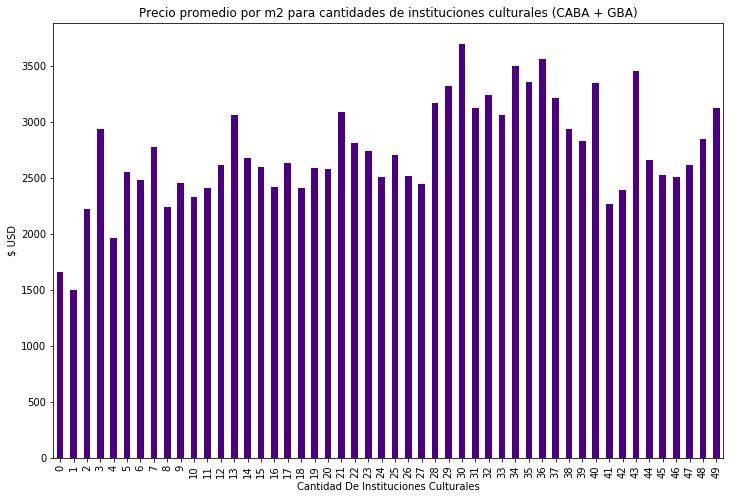

In [57]:

turPlot = turRED['price_usd_per_m2', 'mean']
ax = turPlot.plot(kind = 'bar', title="Precio promedio por m2 para cantidades de instituciones culturales (CABA + GBA)",linewidth=2,figsize=(12,8), color='indigo', legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De Instituciones Culturales')

plt.show()


In [58]:
#solo caba
caba = props[props['state_name'].str.contains("Capital Federal")]

turCABA = caba[['Cant_LugaresTuristicos','price_usd_per_m2']].groupby('Cant_LugaresTuristicos').\
    agg([np.mean, np.size])
turCABA.reset_index(inplace=True)

turREDCaba = turCABA[turCABA['Cant_LugaresTuristicos'] < 65]
turREDCaba = turREDCaba[turREDCaba['price_usd_per_m2', 'size'] > 10]
turREDCaba.reset_index(inplace=True)
turREDCaba.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

index Cant_LugaresTuristicos price_usd_per_m2            
                                                    mean        size
count  50.000000              50.000000        50.000000    50.00000
mean   24.860000              24.880000      2902.060669   623.52000
std    15.277047              15.323238       511.941591   862.21488
min     0.000000               0.000000      2177.368043    11.00000
1%      0.490000               0.490000      2219.745505    11.49000
10%     4.900000               4.900000      2425.947175    36.00000
25%    12.250000              12.250000      2535.113135    58.25000
50%    24.500000              24.500000      2737.816948   144.00000
75%    36.750000              36.750000      3158.762131   874.00000
90%    44.100000              44.100000      3460.722296  1909.40000
99%    57.530000              58.040000      4594.267224  3170.06000
max    59.000000              60.000000      4689.300271  3565.00000

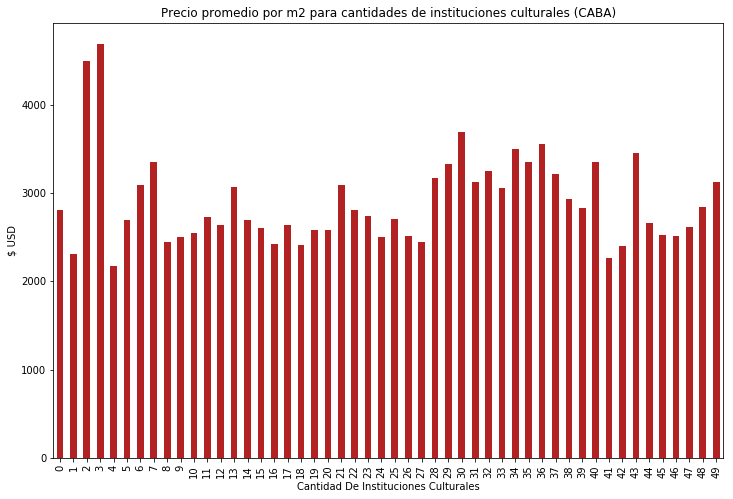

In [59]:

turPlotCABA = turREDCaba['price_usd_per_m2', 'mean']
ax = turPlotCABA.plot(kind = 'bar', title="Precio promedio por m2 para cantidades de instituciones culturales (CABA)",linewidth=2,figsize=(12,8), color='firebrick', legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De Instituciones Culturales')

plt.show()


In [60]:
#solo GBA
gba = props[props['state_name'] != ("Capital Federal")]

turGBA = gba[['Cant_LugaresTuristicos','price_usd_per_m2']].groupby('Cant_LugaresTuristicos').\
    agg([np.mean, np.size])
turGBA.reset_index(inplace=True)

turREDGBA = turGBA[turGBA['Cant_LugaresTuristicos'] < 65]
turREDGBA = turREDGBA[turREDGBA['price_usd_per_m2', 'size'] > 10]
turREDGBA.reset_index(inplace=True)
turREDGBA.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

index Cant_LugaresTuristicos price_usd_per_m2              
                                                    mean          size
count  15.000000              15.000000        15.000000     15.000000
mean    7.000000               7.000000      1662.857029   2742.000000
std     4.472136               4.472136       284.671072   4220.844499
min     0.000000               0.000000      1296.123690     11.000000
1%      0.140000               0.140000      1307.288133     12.120000
10%     1.400000               1.400000      1376.933191     19.400000
25%     3.500000               3.500000      1447.534539    206.000000
50%     7.000000               7.000000      1632.747376   1020.000000
75%    10.500000              10.500000      1724.639001   3106.000000
90%    12.600000              12.600000      2047.361135   7631.800000
99%    13.860000              13.860000      2269.551358  14103.200000
max    14.000000              14.000000      2305.643767  15009.000000

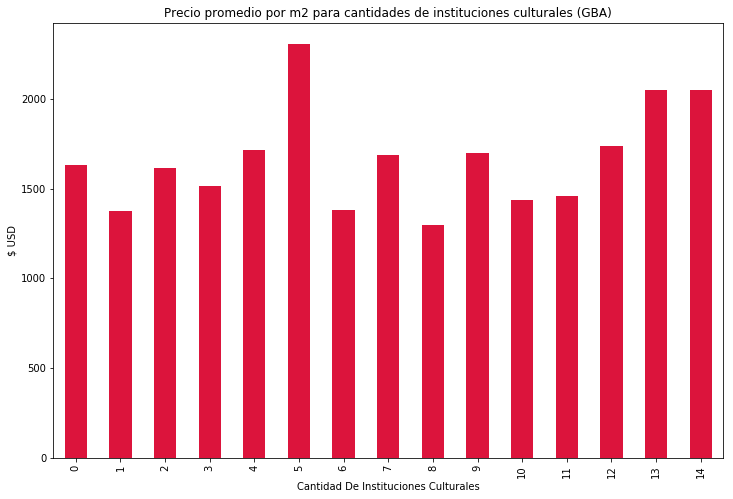

In [61]:
turPlotGBA = turREDGBA['price_usd_per_m2', 'mean']
ax = turPlotGBA.plot(kind = 'bar', title="Precio promedio por m2 para cantidades de instituciones culturales (GBA)",linewidth=2,figsize=(12,8), color='crimson', legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De Instituciones Culturales')

plt.show()


In [62]:
#CABA +GBA de 0 o 1 puntos; HEATMAP con la ubicacion de las propiedades con pocos puntos de interes cultural

turTot = props.copy()
turTot = turTot[turTot['Cant_LugaresTuristicos'] < 2]

locations = turTot['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [63]:
heatmap_layer.max_intensity = 200
heatmap_layer.point_radius = 5

In [64]:
#solo caba
caba = props[props['state_name'].str.contains("Capital Federal")]

turCABA = caba[['Cant_LugaresTuristicos','price_usd_per_m2']].groupby('Cant_LugaresTuristicos').\
    agg([np.mean, np.size])
turCABA.reset_index(inplace=True)

#turREDCaba = turCABA[turCABA['Cant_LugaresTuristicos']]
turREDCaba = turCABA[turCABA['price_usd_per_m2', 'size'] > 400]
turREDCaba.reset_index(inplace=True)
turREDCaba.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

index Cant_LugaresTuristicos price_usd_per_m2             
                                                    mean         size
count  18.000000              18.000000        18.000000    18.000000
mean   12.500000              12.500000      2913.694518  1530.166667
std    12.481751              12.481751       700.007787   872.501964
min     1.000000               1.000000      2177.368043   453.000000
1%      1.170000               1.170000      2200.106749   455.550000
10%     2.700000               2.700000      2392.409666   482.000000
25%     5.250000               5.250000      2500.425829   792.000000
50%     9.500000               9.500000      2666.670090  1599.000000
75%    13.750000              13.750000      3086.249108  1912.000000
90%    24.100000              24.100000      3767.963214  2675.700000
99%    45.490000              45.490000      4656.329622  3427.980000
max    46.000000              46.000000      4689.300271  3565.000000

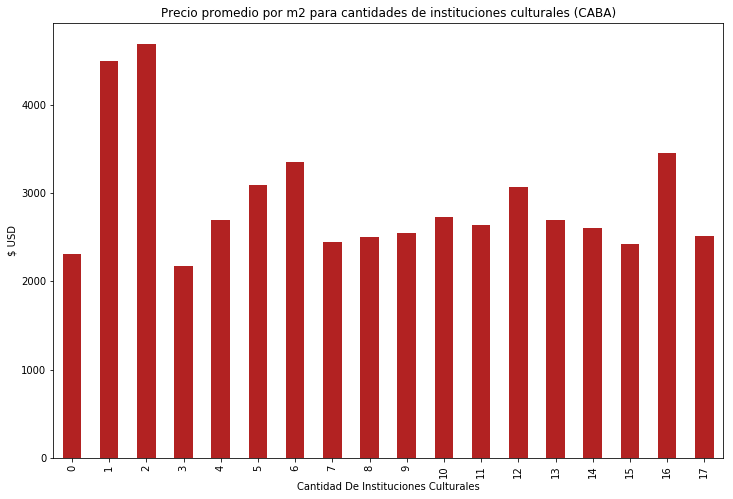

In [65]:

turPlotCABA = turREDCaba['price_usd_per_m2', 'mean']
ax = turPlotCABA.plot(kind = 'bar', title="Precio promedio por m2 para cantidades de instituciones culturales (CABA)",linewidth=2,figsize=(12,8), color='firebrick', legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De Instituciones Culturales')

plt.show()


In [66]:

#solo caba
caba = props[props['state_name'].str.contains("Capital Federal")]

turCABA = caba[(caba['Cant_LugaresTuristicos'] < 3) & (caba['Cant_LugaresTuristicos'] > 0)]

#CABA de 2 o 3 puntos; HEATMAP con la ubicacion de las propiedades con pocos puntos de interes cultural
locations = turCABA['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [67]:
heatmap_layer.max_intensity = 10
heatmap_layer.point_radius = 5

### Cuales son los polos mas importantes

In [68]:
locations = props['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=props['Cant_LugaresTuristicos'])

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [69]:
heatmap_layer.max_intensity = 4000
heatmap_layer.point_radius = 5

## Analisis Transporte Publico

In [70]:
trans = props[['Cant_ParadasTransporte','price_usd_per_m2']].groupby('Cant_ParadasTransporte').\
    agg([np.mean, np.size])
trans.reset_index(inplace=True)

In [71]:
trans.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

Cant_ParadasTransporte price_usd_per_m2              
                                         mean          size
count              53.000000        53.000000     53.000000
mean               26.245283      2141.086419   1367.433962
std                15.901023       507.623369   1690.559381
min                 0.000000       969.175627      2.000000
1%                  0.520000      1052.325065      2.000000
10%                 5.200000      1537.960748     29.000000
25%                13.000000      1929.258564    199.000000
50%                26.000000      2166.050506    834.000000
75%                39.000000      2292.220044   1919.000000
90%                46.800000      2561.532501   3043.200000
99%                57.960000      3753.652781   7356.640000
max                59.000000      3823.908290  10356.000000

In [72]:

trans = trans[trans['price_usd_per_m2', 'size'] > 10]


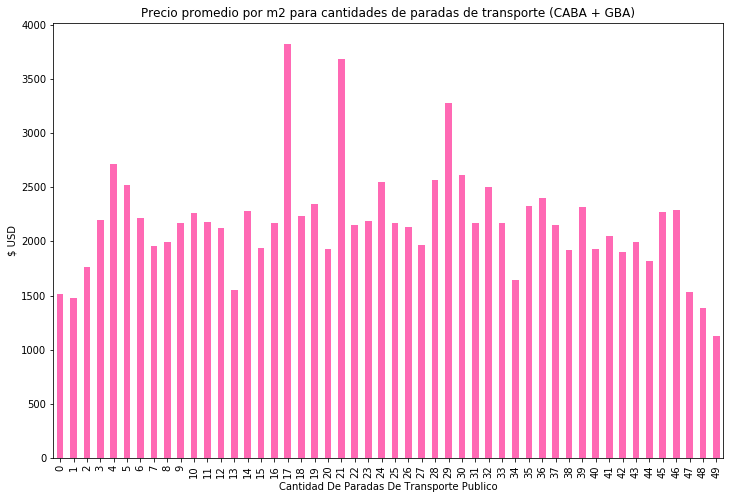

In [73]:
transMEAN = trans['price_usd_per_m2', 'mean']
ax = transMEAN.plot(kind = 'bar', title="Precio promedio por m2 para cantidades de paradas de transporte (CABA + GBA)",linewidth=2,figsize=(12,8), color='hotpink', legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De Paradas De Transporte Publico')

plt.show()

In [74]:
#solo caba
caba = props[props['state_name'].str.contains("Capital Federal")]


In [75]:
transCABA = caba[['Cant_ParadasTransporte','price_usd_per_m2']].groupby('Cant_ParadasTransporte').\
    agg([np.mean, np.size])
transCABA.reset_index(inplace=True)
transCABA.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

Cant_ParadasTransporte price_usd_per_m2            
                                         mean        size
count               50.00000        50.000000    50.00000
mean                24.50000      2874.172829   626.76000
std                 14.57738       844.307562   622.49349
min                  0.00000      1916.232840     1.00000
1%                   0.49000      1939.470307     1.49000
10%                  4.90000      2107.835897    28.70000
25%                 12.25000      2403.217425    97.75000
50%                 24.50000      2609.317175   392.00000
75%                 36.75000      2989.895829  1042.75000
90%                 44.10000      4029.000100  1382.80000
99%                 48.51000      5219.032351  2381.16000
max                 49.00000      5258.703660  2683.00000

In [76]:
transCABA = transCABA[transCABA['price_usd_per_m2', 'size'] > 10]

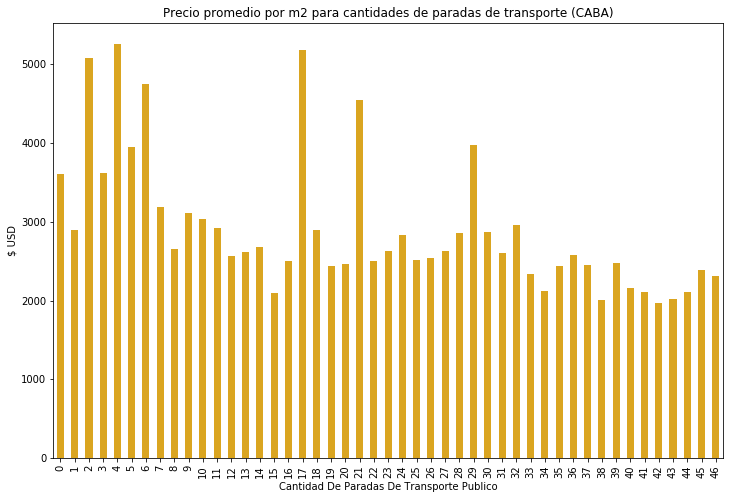

In [77]:
transCABAMEAN = transCABA['price_usd_per_m2', 'mean']
ax = transCABAMEAN.plot(kind = 'bar', title="Precio promedio por m2 para cantidades de paradas de transporte (CABA)",linewidth=2,figsize=(12,8), color='goldenrod', legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De Paradas De Transporte Publico')

plt.show()

In [78]:
#solo GBA
gba = props[props['state_name']!="Capital Federal"]
transGBA = gba[['Cant_ParadasTransporte','price_usd_per_m2']].groupby('Cant_ParadasTransporte').\
    agg([np.mean, np.size])
transGBA.reset_index(inplace=True)
transGBA.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

Cant_ParadasTransporte price_usd_per_m2              
                                         mean          size
count              53.000000        53.000000     53.000000
mean               26.245283      1557.165947    776.150943
std                15.901023       308.495374   1483.507608
min                 0.000000       905.938483      2.000000
1%                  0.520000       938.821798      2.000000
10%                 5.200000      1209.112836      7.200000
25%                13.000000      1356.716104     43.000000
50%                26.000000      1509.191723    462.000000
75%                39.000000      1730.051792    865.000000
90%                46.800000      1995.860642   1850.000000
99%                57.960000      2243.428030   6259.240000
max                59.000000      2250.049577  10309.000000

In [79]:
transGBA = transGBA[transGBA['price_usd_per_m2', 'size'] > 10]

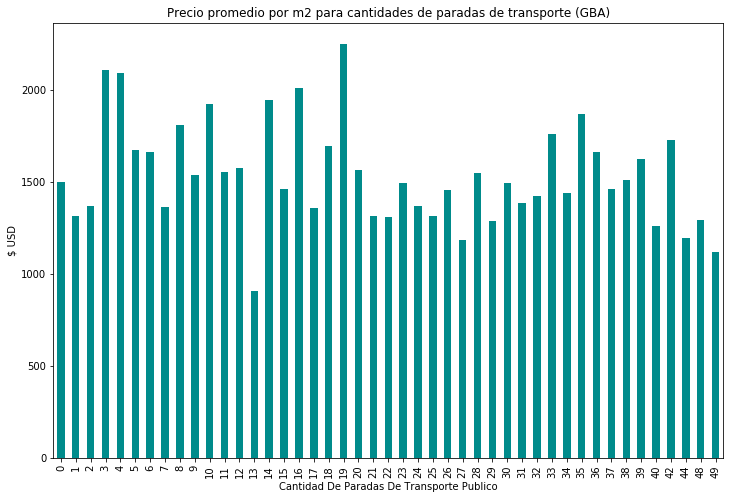

In [80]:
transGBAMEAN = transGBA['price_usd_per_m2', 'mean']
ax = transGBAMEAN.plot(kind = 'bar', title="Precio promedio por m2 para cantidades de paradas de transporte (GBA)",linewidth=2,figsize=(12,8), color='darkcyan', legend=False)
ax.set_ylabel('$ USD')
ax.set_xlabel('Cantidad De Paradas De Transporte Publico')

plt.show()

In [81]:
#precio por metro cuadrado mayor a $2000 CABA + GBA peso en cant transporte
transMAY = props[props['price_usd_per_m2'] > 2000]

locations = transMAY['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=transMAY['Cant_ParadasTransporte'])

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [82]:
heatmap_layer.max_intensity = 450
heatmap_layer.point_radius = 5

In [83]:
#precio por metro cuadrado menor a $2000 CABA + GBA peso en cant transporte
transMEN = props[props['price_usd_per_m2'] < 2000]

locations = transMEN['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=transMEN['Cant_ParadasTransporte'])

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [84]:
heatmap_layer.max_intensity = 450
heatmap_layer.point_radius = 5

In [85]:
#Heatmap CABA + GBA  propiedades con cant transporte mayor a 35 y el peso del heatmap puesto en la cantidad de paradas
transMAS35 = props[props['Cant_ParadasTransporte'] > 35]

locations = transMAS35['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=transMAS35['Cant_ParadasTransporte'])

fig.add_layer(heatmap_layer)
fig.add_layer(gmaps.transit_layer())
fig

A Jupyter Widget

In [86]:
#Heatmap CABA + GBA  propiedades con cant transporte menor a 8 y el peso del heatmap puesto en la cantidad de paradas
transMENOS8 = props[props['Cant_ParadasTransporte'] < 8]

locations = transMENOS8['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=transMENOS8['Cant_ParadasTransporte'])

fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [87]:
heatmap_layer.max_intensity = 2000
heatmap_layer.point_radius = 10

In [88]:
#Heatmap CABA + GBA  el peso del heatmap puesto en la cantidad de paradas

locations = props['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=props['Cant_ParadasTransporte'])

fig.add_layer(heatmap_layer)
fig.add_layer(gmaps.transit_layer())
fig

A Jupyter Widget

In [89]:
heatmap_layer.max_intensity = 10000000
heatmap_layer.point_radius = 50

In [90]:
#Heatmap CABA + GBA  el peso del heatmap puesto en el precio por metro cuadrado

locations = props['latlon']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=props['price_usd_per_m2'])

fig.add_layer(heatmap_layer)
fig.add_layer(gmaps.transit_layer())
fig

A Jupyter Widget

In [91]:
heatmap_layer.max_intensity = 1000000
heatmap_layer.point_radius = 50